This Notebook performs a comprehensive analysis of a dataset containing information on 2000 companies in 2021. The analysis includes importing necessary libraries, loading and cleaning the data, and visualizing key financial metrics. Specifically, the notebook converts financial figures to a consistent format, scales them to billions, and then creates histograms to show the distribution of `Sales`, `Profit`, `Assets`, and `Market Value`. Additionally, a scatterplot matrix is generated to illustrate the relationships and relative variations between these metrics. The visualizations are saved as PDF files for further examination.

# Import Required Libraries
Import the necessary libraries, including pandas and matplotlib.

In [1]:
# Import the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import os
from dotenv import load_dotenv


# Load Data
Load the data into a pandas DataFrame.

In [2]:
# Load environment variables from .env file
load_dotenv()

# Get the file path from the environment variable
file_path = os.getenv("DATA_PATH")

# Load the data into a pandas DataFrame and display the first few rows to ensure it's loaded correctly
df = pd.read_csv(file_path)
df.head()

,Rank,Name,Country,Sales,Profit,Assets,Market Value
0,1,ICBC,China,$190.5 B,$45.8 B,"$4,914.7 B",$249.5 B
1,2,JPMorgan Chase,United States,$136.2 B,$40.4 B,"$3,689.3 B",$464.8 B
2,3,Berkshire Hathaway,United States,$245.5 B,$42.5 B,$873.7 B,$624.4 B
3,4,China Construction Bank,China,$173.5 B,$39.3 B,"$4,301.7 B",$210.4 B
4,5,Saudi Arabian Oil Company (Saudi Aramco),Saudi Arabia,$229.7 B,$49.3 B,$510.3 B,"$1,897.2 B"


# Clean Data
Convert string values to float and scale down the relevant columns to billions.

In [3]:
# Function to convert strings to float
def convert_to_float(x):
	if isinstance(x, float) or isinstance(x, int):
		return x
	x = x.replace(',', '')  # Remove commas
	if 'B' in x:
		return float(x.replace('$', '').replace('B', '')) * 1e9
	elif 'M' in x:
		return float(x.replace('$', '').replace('M', '')) * 1e6
	else:
		return float(x.replace('$', ''))

# Apply the conversion function to the relevant columns
df['Sales'] = df['Sales'].apply(convert_to_float)
df['Profit'] = df['Profit'].apply(convert_to_float)
df['Assets'] = df['Assets'].apply(convert_to_float)
df['Market Value'] = df['Market Value'].apply(convert_to_float)

# Scale down the relevant columns to billions
df['Sales'] = df['Sales'] / 1e9
df['Profit'] = df['Profit'] / 1e9
df['Assets'] = df['Assets'] / 1e9
df['Market Value'] = df['Market Value'] / 1e9

# Display the first few rows of the scaled DataFrame to ensure it's scaled correctly
df.head()


,Rank,Name,Country,Sales,Profit,Assets,Market Value
0,1,ICBC,China,190.5,45.8,4914.7,249.5
1,2,JPMorgan Chase,United States,136.2,40.4,3689.3,464.8
2,3,Berkshire Hathaway,United States,245.5,42.5,873.7,624.4
3,4,China Construction Bank,China,173.5,39.3,4301.7,210.4
4,5,Saudi Arabian Oil Company (Saudi Aramco),Saudi Arabia,229.7,49.3,510.3,1897.2


# Histograms
Create histograms for Sales, Profit, Assets, and Market Value using matplotlib and save them as a PDF.

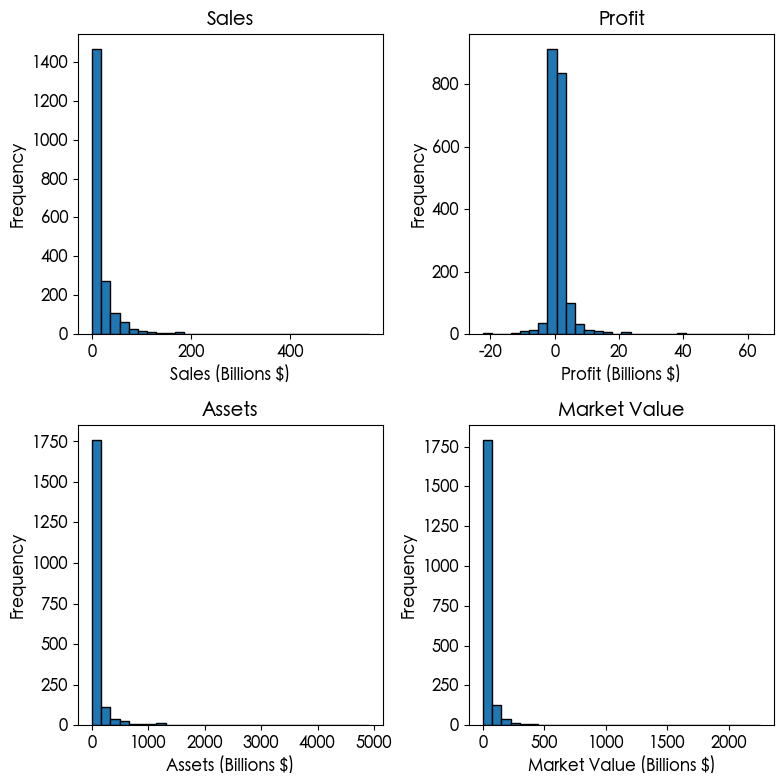

In [4]:
# Histograms with frequency labels
plt.figure(figsize=(8, 8))

# Create subplots
plt.subplot(2, 2, 1)
plt.hist(df['Sales'], bins=30, edgecolor='black')
plt.xlabel('Sales (Billions $)')
plt.ylabel('Frequency')
plt.title('Sales')

plt.subplot(2, 2, 2)
plt.hist(df['Profit'], bins=30, edgecolor='black')
plt.xlabel('Profit (Billions $)')
plt.ylabel('Frequency')
plt.title('Profit')

plt.subplot(2, 2, 3)
plt.hist(df['Assets'], bins=30, edgecolor='black')
plt.xlabel('Assets (Billions $)')
plt.ylabel('Frequency')
plt.title('Assets')

plt.subplot(2, 2, 4)
plt.hist(df['Market Value'], bins=30, edgecolor='black')
plt.xlabel('Market Value (Billions $)')
plt.ylabel('Frequency')
plt.title('Market Value')

# Adjust layout and display the histograms
plt.tight_layout()
plt.show()


# Scatterplot matrix
Create Scatterplot matrix using seaborn and save them as a PDF.

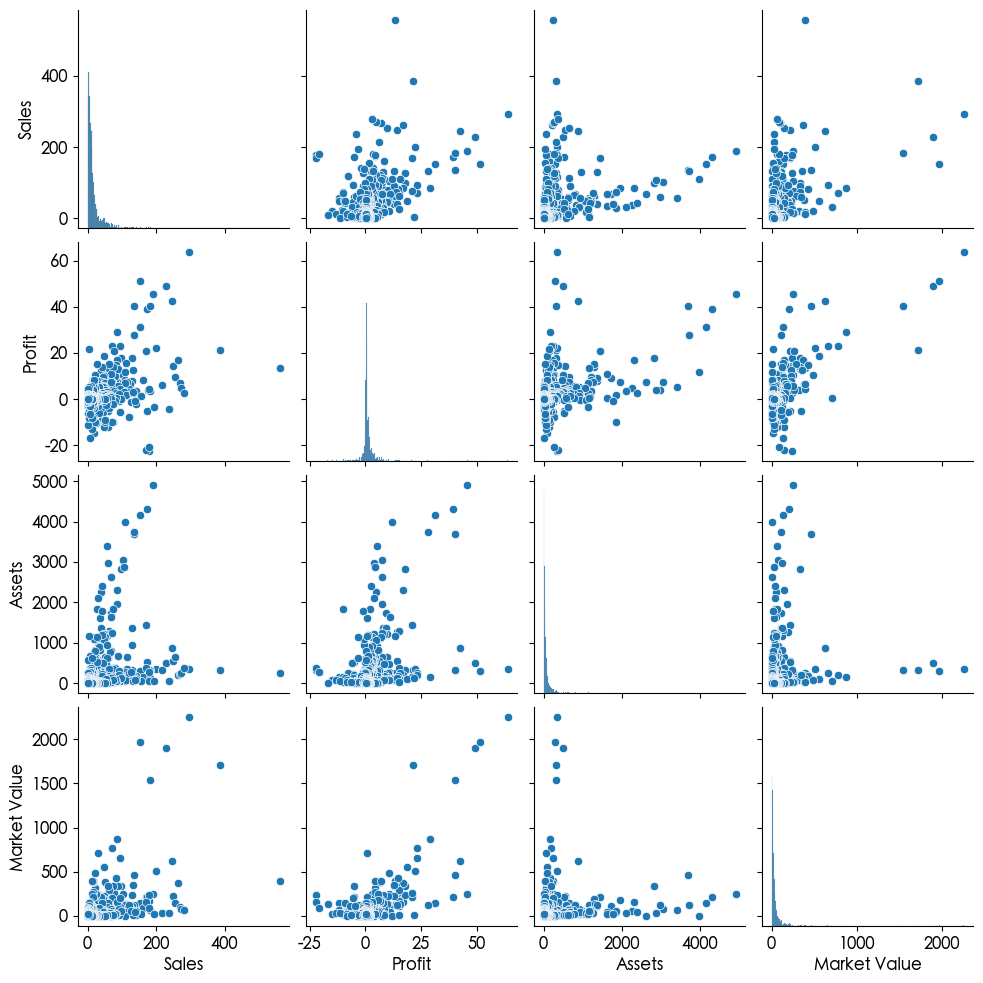

In [5]:
import seaborn as sns

# Create a scatterplot matrix
sns.pairplot(df[['Sales', 'Profit', 'Assets', 'Market Value']])

# Display the scatterplot matrix
plt.show()
